In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import matplotlib 


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

np.random.seed(1000)
% matplotlib inline 

idx = pd.IndexSlice

C:\Users\Alexandre\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv('train.csv')
data["Date"] = pd.to_datetime(data["Date"])

data_indexed = data.set_index(["Date","City"])
data_indexed = data_indexed.sort_index()
data_indexed.head()
data_indexed.head(3)

Doctors allocated  Nr_patients  \
Date       City                                              
2016-01-04 Abrantes                         0            0   
           Aguiar da Beira                  0            0   
           Alandroal                        0            0   

                            Deaths from lack of doctors Hospital Type  \
Date       City                                                         
2016-01-04 Abrantes                                 0.0        Clinic   
           Aguiar da Beira                          0.0        Clinic   
           Alandroal                                0.0        Clinic   

                            National Holiday  \
Date       City                                
2016-01-04 Abrantes                        1   
           Aguiar da Beira                 1   
           Alandroal                       1   

                            News on local media about deseases  \
Date       City                                                  
2016-01-04 Abrantes                                          0   
           Aguiar da Beira                                   0   
           Alandroal                                         0   

                            Students on Holiday  Hospital active  
Date       City                                                   
2016-01-04 Abrantes                           1                0  
           Aguiar da Beira                    1                0  
           Alandroal                          1                0

In [3]:
columns_to_drop=[
    "City", #will have on model per city so city isn't a feature, the same goes for hospital type
    "Doctors allocated", # not necessary, just want to predict Nr_patients
    "Hospital Type"] 
    
feat_data_city1 = data[data.City=="Abrantes"].drop(columns_to_drop,1)
feat_data_city1["Date"] = pd.to_datetime(feat_data_city1["Date"])
feat_data_city1 = feat_data_city1.set_index(["Date"]).sort_index()
feat_data_city1.head()

,Nr_patients,Deaths from lack of doctors,National Holiday,News on local media about deseases,Students on Holiday,Hospital active
Date,,,,,,
2016-01-04,0,0.0,1,0,1,0
2016-01-05,849,0.0,0,0,1,1
2016-01-06,767,0.0,0,0,1,1
2016-01-07,837,0.0,0,0,1,1
2016-01-08,972,0.0,0,0,0,1


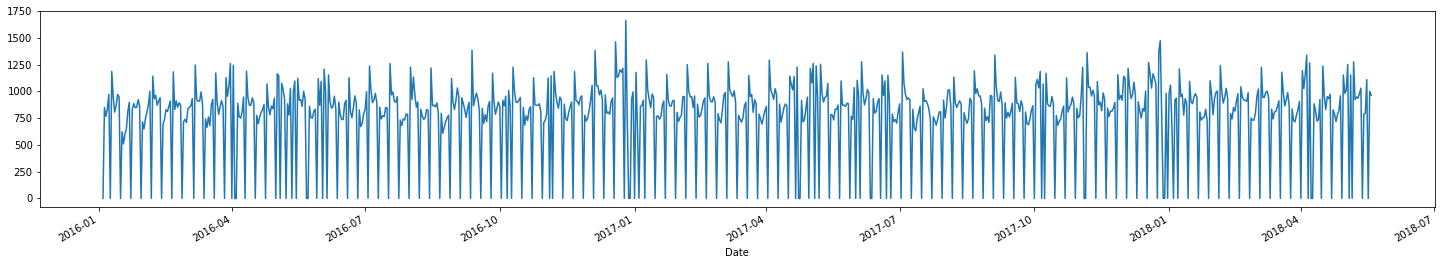

In [4]:
feat_data_city1.Nr_patients.plot(figsize=(25,4));
plt.show()

In [29]:
aux.index.freq

1

In [20]:
aux = feat_data_city1["Nr_patients"]
aux.dtype

dtype('int64')

In [22]:
decomposition = seasonal_decompose(aux, model='additive')
decomposition.plot()
plt.show()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index witha freq not set to None

### Feature engineering
#### New target: Diff in Nr_patients for the previous week
#### New features:
   * Difference Nr_patients from one week to the next, i.e same weekday
   * Differenec Nr_patients to the previous year (same weekday on the same weeknumber)
   * Difference in Nr_patients from the previous day
   * Weeknumber (epoch of the year)
   * weekday
   * day of the month?
   * difference in every other feature to the previous week? National Holiday, News, Students on Holidays, Hospital Active

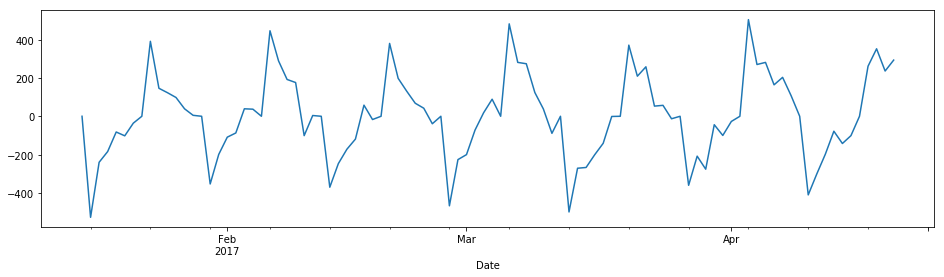

In [9]:
sample= feat_data_city1.diff(7).loc[idx["2017-01-15":"2017-04-20"],"Nr_patients"]
sample.plot(figsize=(16,4))

In [10]:
sample=feat_data_city1.diff(7).loc[idx["2017-01-15":"2017-04-20"],"Nr_patients"]

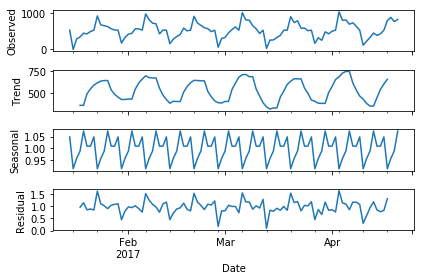

In [11]:
decomposition = seasonal_decompose(sample - sample.min()+1, model='multiplicative')
decomposition.plot()
plt.show()

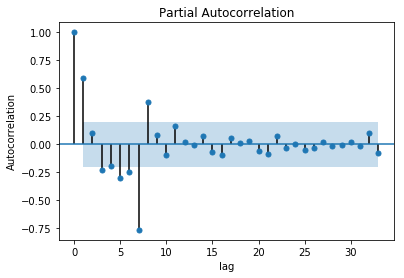

In [15]:
plot_pacf(sample, alpha=.05, lags=33)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()